## Calculating and Visualizing correlations and linear relationships

In [73]:
# !pip install scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr,spearmanr

In [2]:
bikesharing_data = pd.read_csv('bike-sharing-daily.csv', index_col=0)

bikesharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bikesharing_data.shape

(731, 15)

In [5]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
# convert the dteday column into a date-time format

bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

bikesharing_data['dteday'][:5]

instant
1   2011-01-01
2   2011-01-02
3   2011-01-03
4   2011-01-04
5   2011-01-05
Name: dteday, dtype: datetime64[ns]

In [8]:
np.corrcoef(bikesharing_data['temp'],bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [9]:
##  Another way to cal the above is

bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

In [10]:
# Evaluating the linear relationship between two variables - 
# Calculating the correlation coefficient (same as above) and the P-value
# Pvalue tells us whether the coef is significant or not
# Small P values indicate that this coef is not due to chance, this is significant

pearsonr(bikesharing_data['temp'],bikesharing_data['cnt'])

(0.6274940090334921, 2.810622397589902e-81)

In [11]:
# Spearman correlation coef
# Based on the Ranks of the variables rather than actual raw values - usually used with ordinal data
# I.e. data with discrete values such as the star reading of a product which are ordered
# P value is small and significant too. Note that any vale under 0.05 is significant 

#pearsonr(bikesharing_data['temp'],bikesharing_data['cnt'])
spearmanr(bikesharing_data['temp'],bikesharing_data['cnt'])

# the corr coef that we calculated for these two variables tells us that there is a linear relationship that exists between 
# these two variables


SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

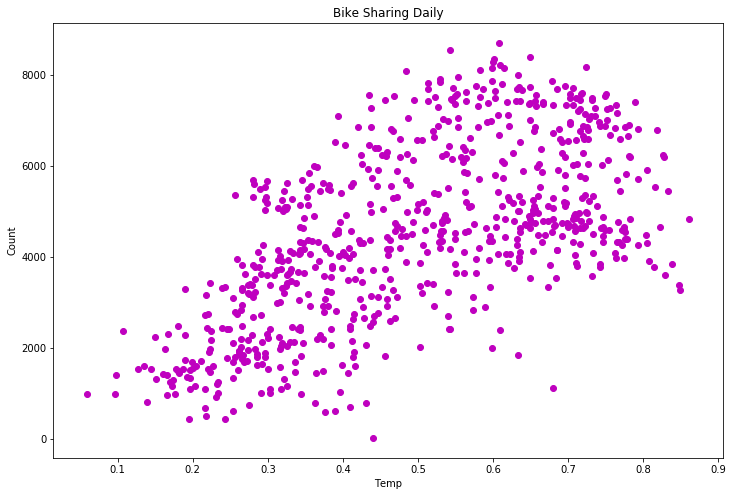

In [13]:
plt.figure(figsize=(12,8))

plt.scatter(bikesharing_data['temp'],bikesharing_data['cnt'], color='m')

plt.title('Bike Sharing Daily')

plt.xlabel('Temp')
plt.ylabel('Count')

plt.show()

In [14]:
np.corrcoef(bikesharing_data['workingday'],bikesharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [15]:
pearsonr(bikesharing_data['workingday'],bikesharing_data['registered'])

(0.3039071170459174, 4.381571089369631e-17)

In [16]:
spearmanr(bikesharing_data['workingday'],bikesharing_data['registered'])

SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

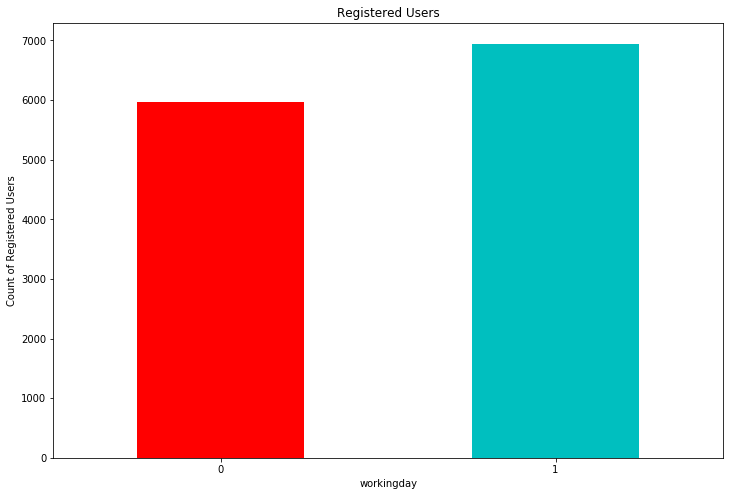

In [24]:
# All the above show a positive relationships
# Visualising it using a bar graph

ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['registered'].plot(kind='bar', figsize=(12,8), ax=ax, color=['r','c'])

plt.title('Registered Users')

plt.xticks(rotation=360)
plt.ylabel('Count of Registered Users')


plt.show()

# On a working day the counts are higher

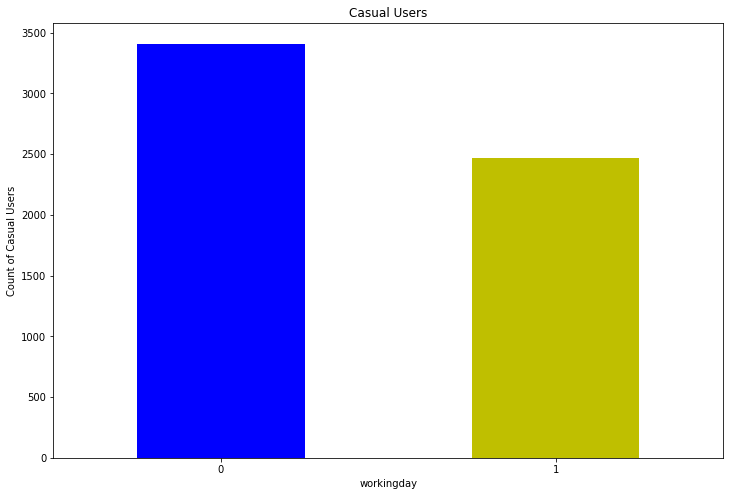

In [26]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['casual'].plot(kind='bar', figsize=(12,8), ax=ax, color=['b','y'])

plt.title('Casual Users')

plt.xticks(rotation=360)
plt.ylabel('Count of Casual Users')


plt.show()

# On a non-working day the counts are higher

In [27]:
pearsonr(bikesharing_data['windspeed'],bikesharing_data['cnt'])
#spearmanr(bikesharing_data['temp'],bikesharing_data['cnt'])

(-0.23454499742167007, 1.3599586778866672e-10)

In [28]:
spearmanr(bikesharing_data['windspeed'],bikesharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

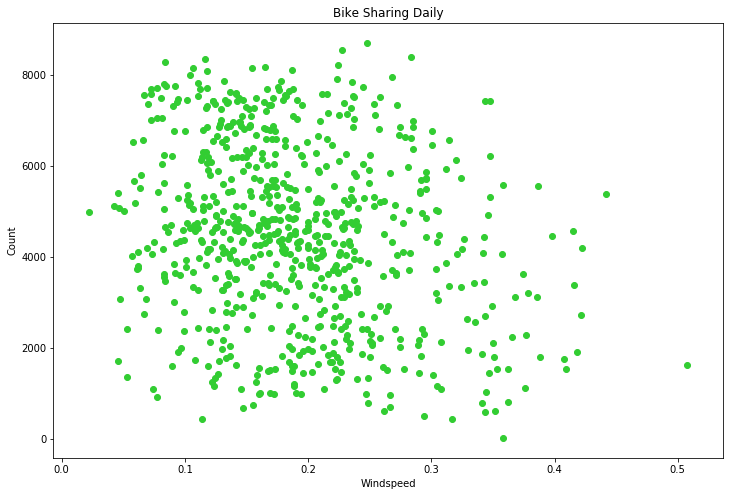

In [30]:
plt.figure(figsize=(12,8))

plt.scatter(bikesharing_data['windspeed'],bikesharing_data['cnt'], color='limegreen')

plt.title('Bike Sharing Daily')

plt.xlabel('Windspeed')
plt.ylabel('Count')

plt.show()

# Negative linear relationhip

In [31]:
bikesharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


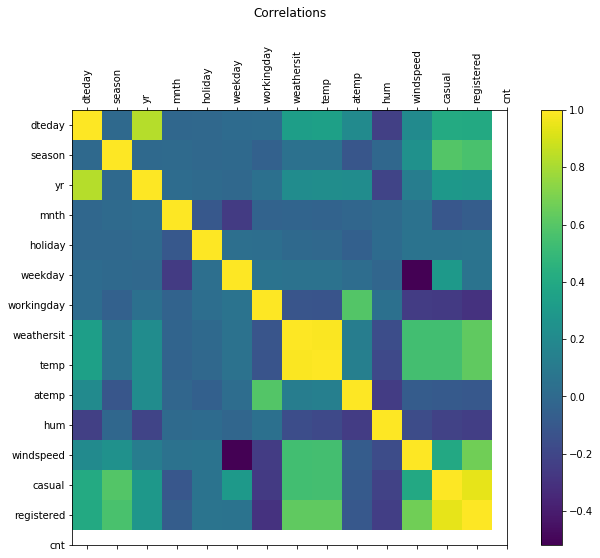

In [32]:
# Heatmap using matplotlib

plt.figure(figsize=(12,8))

plt.matshow(bikesharing_data.corr(), fignum=False, aspect='equal')

columns = len(bikesharing_data.columns)

plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [33]:
!pip install yellowbrick

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000044A0959D30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))': /simple/yellowbrick/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000044A09595F8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))': /simple/yellowbrick/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000044A09595C0>: Failed to establish a new connection: [Er

In [34]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [35]:
target = bikesharing_data['cnt']

features = bikesharing_data.drop(['casual', 'registered','cnt','dteday'],axis=1)

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

feature_names

In [ ]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(feature,target) # use to calculate correlations 

visualizer.poof() # once the correlations are calculated display them using this visualizer 

## Autocorrelation Video

Autocorrelation = measures the relationship between a variable's current value and past value
i.e. a correlation of a variable with itself with a time lag

Similar to correlation,the variable ranges from -1 to 1

## Calculating and Visualising AutoCorrelations

In [36]:
bikesharing_data = pd.read_csv('bike-sharing-hourly.csv', index_col=0)

bikesharing_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [38]:
bikesharing_data[['temp', 'hum']].describe()

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [39]:
bikesharing_data[['temp', 'hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [40]:
# it is reasonable to assume that the temp right now is correlated with the temperature 2hr ago
# two lags means two time period and in our data set 2 time periods refers to two hours

bikesharing_data['temp'].autocorr(lag=2)

# the temp 2 hrs ago is a strong predictor of the temp rn

0.980684914901323

In [41]:
bikesharing_data['temp'].autocorr(lag=12)

# Strongly positively correlated
# Note temp depends on the season

0.8250709628213121

In [42]:
bikesharing_data['temp'].autocorr(lag=102)

# as you increase the time lag in the autocorrelation, you will find that the autocorrelation value drops

0.7658269022298079

In [43]:
bikesharing_data['temp'].autocorr(lag=1002)

# increase the lag even further to 1002, the corr value drops further

0.5654240428575001

In [44]:
bikesharing_data['hum'].autocorr(lag=12)

# 12 hours is day vs night 
# humidity changes considerably during the day

0.20088188422738348

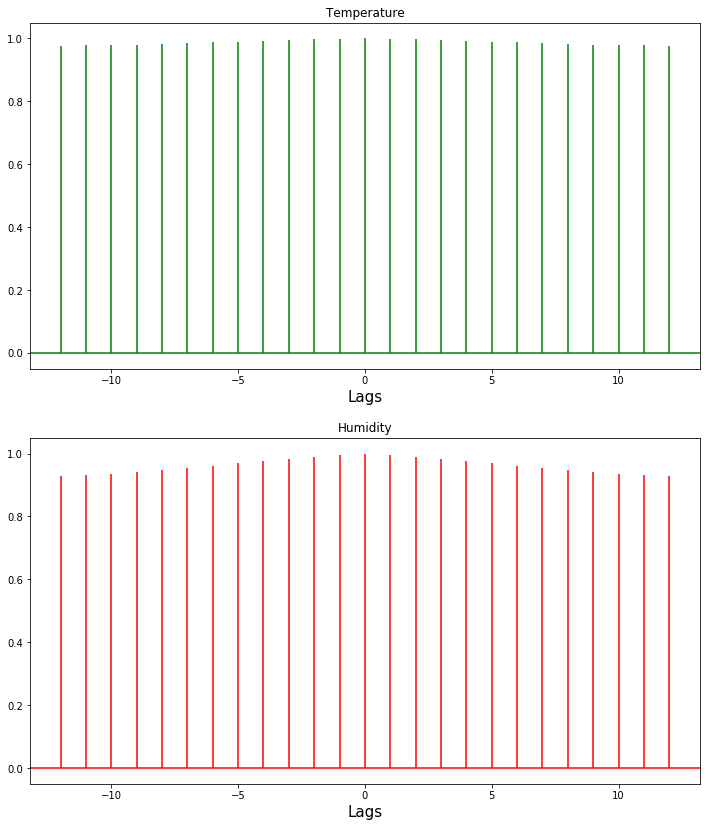

In [48]:
# ploting the data


fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12,14))

ax1.acorr(bikesharing_data['temp'], maxlags=12, color='green')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'], maxlags=12, color='red')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()

In [49]:
bikesharing_data['temp'].autocorr(lag=24)

# temp of the same time today is strongly corr with the temp of the same time yesterday

0.9148730709671985

In [50]:
bikesharing_data['hum'].autocorr(lag=24)

0.4948813054393592

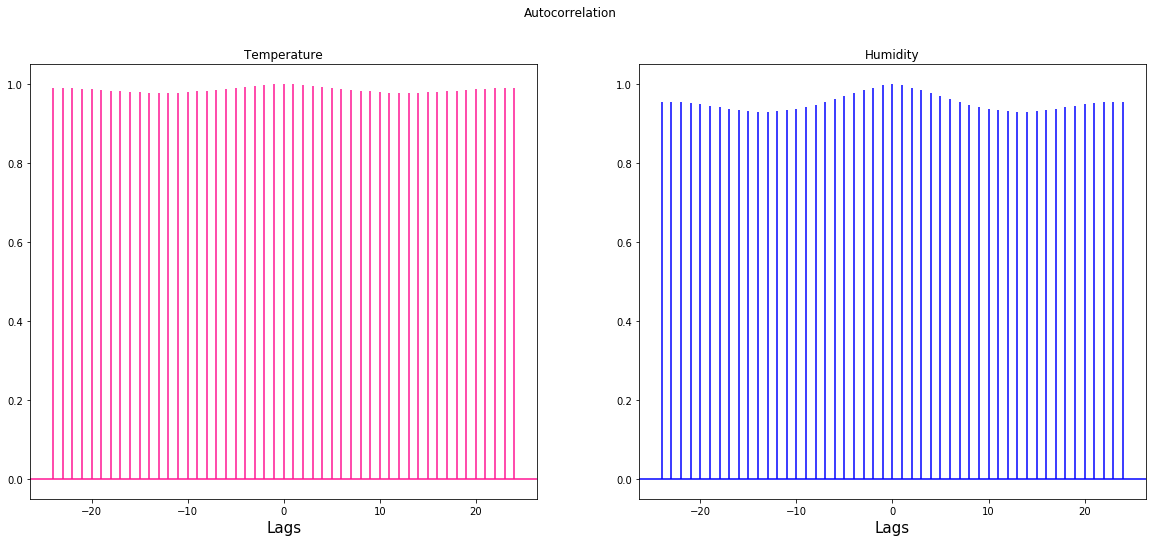

In [55]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.acorr(bikesharing_data['temp'], maxlags=24, color='deeppink')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'], maxlags=24, color='blue')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.suptitle('Autocorrelation')

plt.show()

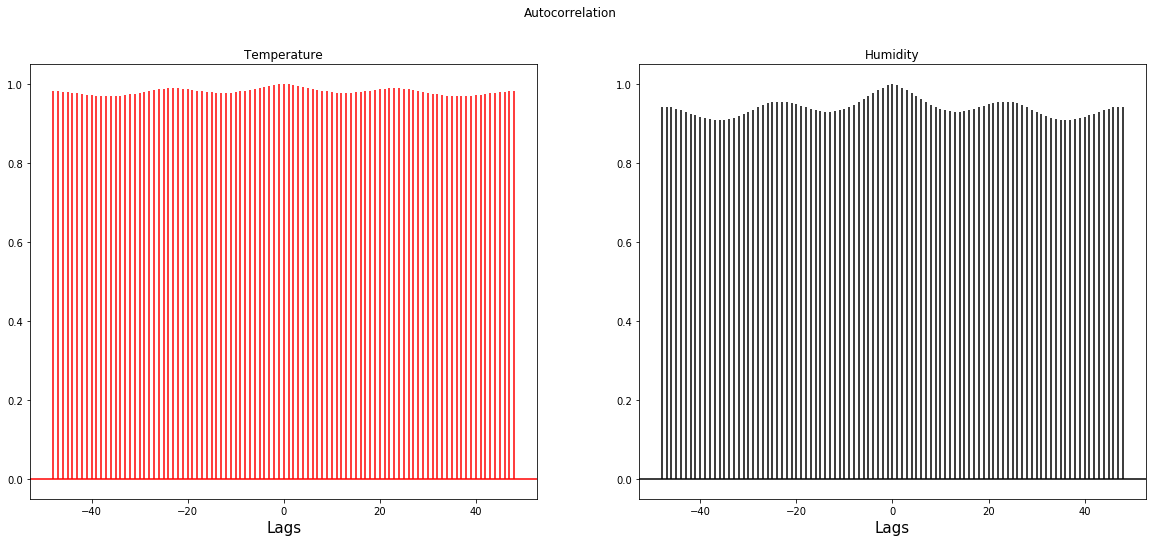

In [56]:
#increasing number of maxlags 
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.acorr(bikesharing_data['temp'], maxlags=48, color='red')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'], maxlags=48, color='black')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.suptitle('Autocorrelation')

plt.show()

## Exploring different visualizations to learn relationships in Data

In [74]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [75]:
bikesharing_data = pd.read_csv('bike-sharing-daily.csv', index_col=0)

bikesharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [59]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

bikesharing_data['dteday'][:5]

instant
1   2011-01-01
2   2011-01-02
3   2011-01-03
4   2011-01-04
5   2011-01-05
Name: dteday, dtype: datetime64[ns]

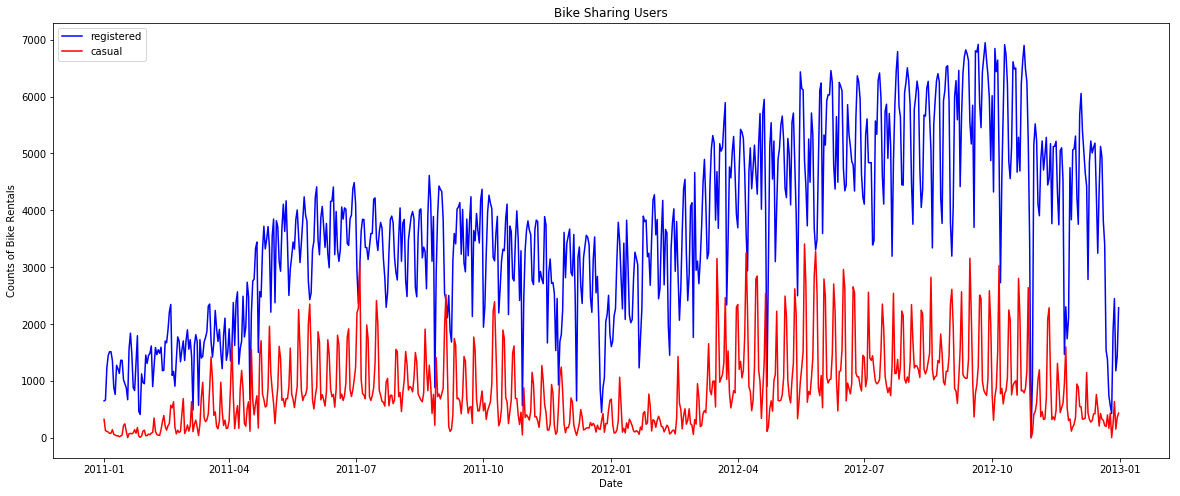

In [61]:
plt.figure(figsize=(20,8))

plt.plot(bikesharing_data['dteday'], bikesharing_data['registered'], color='b', label='registered')
plt.plot(bikesharing_data['dteday'], bikesharing_data['casual'], color='r', label='casual')

plt.legend(loc='upper left')

plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

# Time series Data

In [62]:
year_df = bikesharing_data.groupby('yr', as_index=False).mean()

year_df[['yr', 'cnt']]

# Avr number of bikes rented across the year
# Count of Bike shared: year =0 less bikes have been shared

,yr,cnt
0,0,3405.761644
1,1,5599.934426


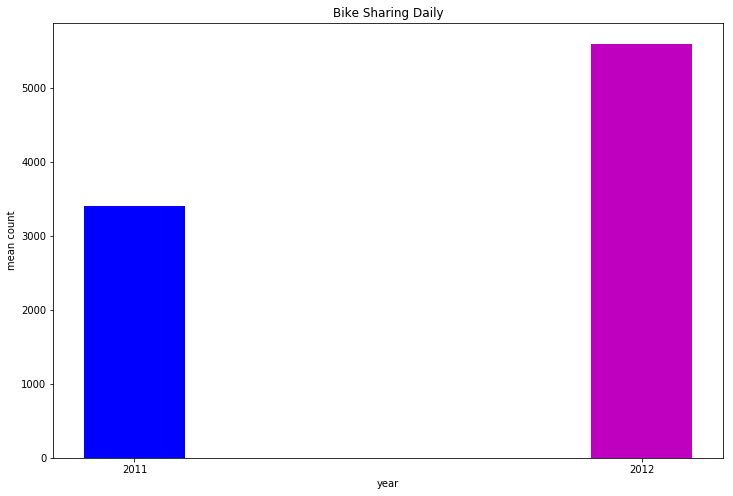

In [64]:
# Year 0 has significantly less Bike Sharers so we can visualise it 

plt.figure(figsize=(12,8))

colors = ['b','m']

plt.bar(year_df['yr'], year_df['cnt'], width=0.2, color=colors)

plt.xticks([0,1], ['2011', '2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('year')
plt.ylabel('mean count')

plt.show()

In [65]:
days = bikesharing_data.groupby('workingday', as_index=False).mean()

days[['cnt']]

# Avr number of bikes rented across working days and non working days

,cnt
0,4330.168831
1,4584.820000


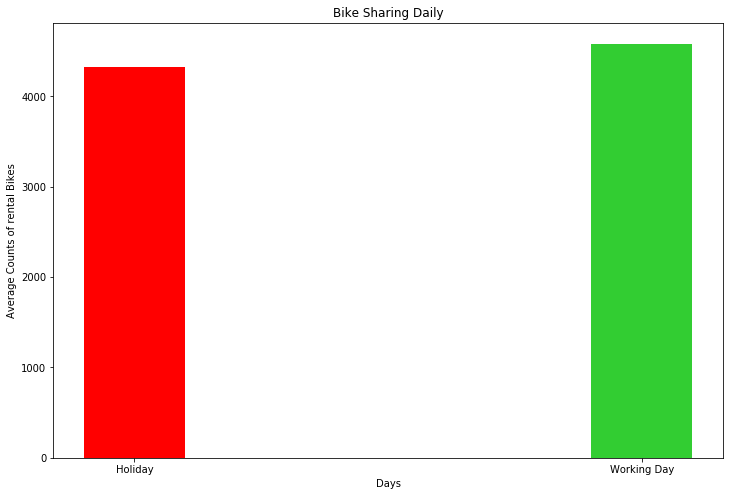

In [67]:
plt.figure(figsize=(12,8))

plt.bar(days['workingday'], days['cnt'], width=0.2, color=['red', 'limegreen'])

plt.xticks([0,1], ['Holiday', 'Working Day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Average Counts of rental Bikes')

plt.show()

In [69]:
year_data = bikesharing_data.loc[bikesharing_data['yr'] ==1]

year_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [70]:
# In year 1 = 2012, is there any monthly variations in the number of bikes rented

month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index=False).mean()

month_df

# avr number of bikes rented for each month 

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [71]:
# Visualizing it but first uodate the dataframe

month_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], 
                         ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)
month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


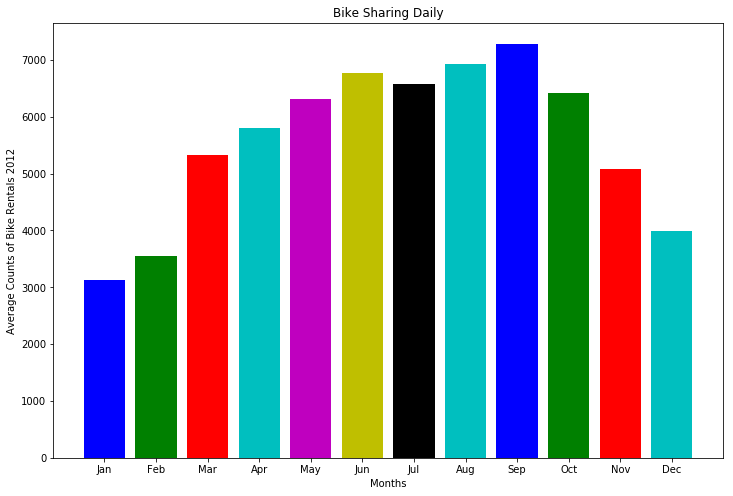

In [72]:
colors = ['b','g','r','c','m', 'y','k','c']

plt.figure(figsize=(12,8))

plt.bar(month_df['mnth'], month_df['cnt'], color=colors)

plt.title('Bike Sharing Daily')
plt.xlabel('Months')
plt.ylabel('Average Counts of Bike Rentals 2012')

plt.show()

# Sept has the highest bike rentals

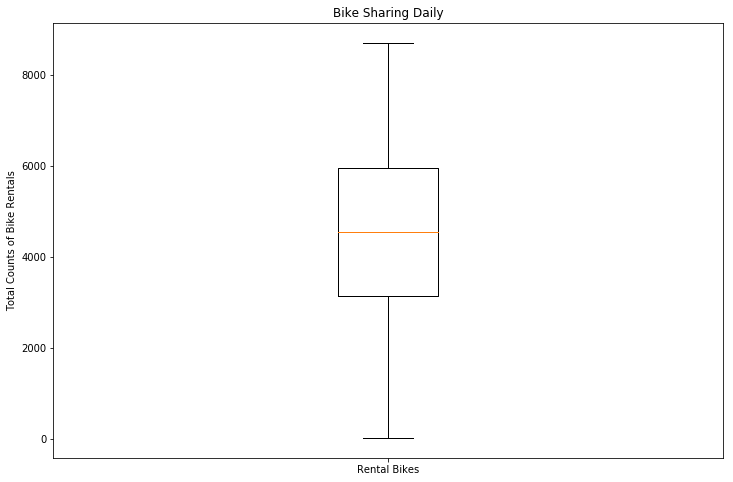

In [83]:
# Statistical DIstribution of the count of bikes rented using a boxplot

plt.figure(figsize=(12,8))

plt.boxplot(bikesharing_data['cnt'])

plt.xticks([1], ['Rental Bikes'])
plt.title('Bike Sharing Daily')
plt.ylabel('Total Counts of Bike Rentals')

plt.show()

# No outliers in this data

In [78]:
selected_bike_data = bikesharing_data[['casual','registered']]

selected_bike_data.head()

,casual,registered
instant,,
1,331,654
2,131,670
3,120,1229
4,108,1454
5,82,1518


In [79]:
# extracting columns names 

columns = selected_bike_data.columns

columns

Index(['casual', 'registered'], dtype='object')

In [80]:
# extracting the columns values into arrays

bike_data_array = selected_bike_data.values

bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]], dtype=int64)

In [81]:
colours = ['g', 'm']

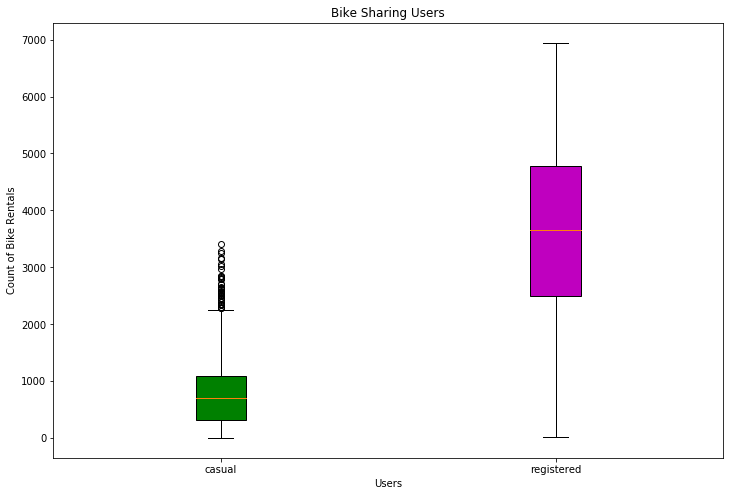

In [82]:
plt.figure(figsize=(12,8))

bp = plt.boxplot(bike_data_array, patch_artist=True, labels=columns)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colours[i])

plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Count of Bike Rentals')

plt.show()

# No outliers in this data

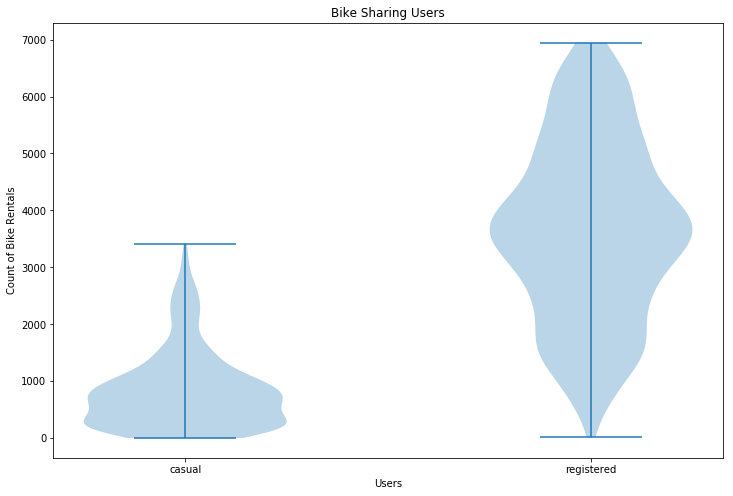

In [84]:
# Alternative representation to the boxplot is the same but with an additional detail is the violin plot 

plt.figure(figsize=(12,8))

vp = plt.violinplot(bike_data_array)

plt.xticks([1,2], columns)

plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Count of Bike Rentals')

plt.show()

# Instead of a box, along the central vertical line you can see the probability density distribution curves 
# This is the KDE curve that shows you how the data points are distributed 

In [85]:
# Using a Pie chart..

season_data = bikesharing_data[['season','cnt']]

season_data.sample(5)

,season,cnt
instant,,
615,3,6203
645,4,7965
396,1,4509
361,1,1162
658,4,5424


In [86]:
grouped_data = season_data.groupby('season', as_index=False).sum()

grouped_data.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [87]:
grouped_data['season'].replace([1,2,3,4], ['spring','summer','autumn','winter'],inplace=True)

grouped_data

,season,cnt
0,spring,471348
1,summer,918589
2,autumn,1061129
3,winter,841613


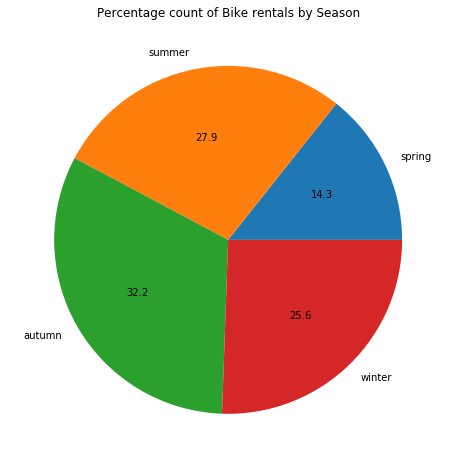

In [89]:
plt.figure(figsize=(12,8))

plt.pie(grouped_data['cnt'], labels=grouped_data['season'], autopct='%.1f')

plt.title('Percentage count of Bike rentals by Season')

plt.show()

# 32% of all bike rentals were rented in autumn 

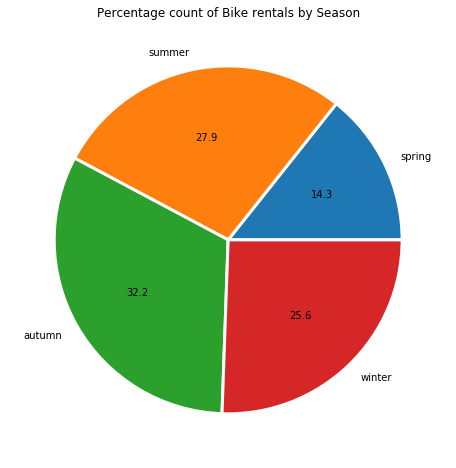

In [91]:
plt.figure(figsize=(12,8))

plt.pie(grouped_data['cnt'], labels=grouped_data['season'], autopct='%.1f', wedgeprops={'linewidth':3, 'edgecolor': 'white'})

plt.title('Percentage count of Bike rentals by Season')

plt.show()

In [92]:
explode_max = (0,0,0.2,0)

explode_min = (0.2,0,0,0)

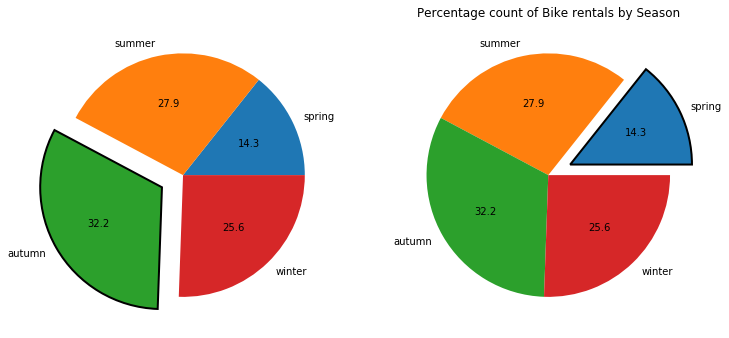

In [98]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

wedges,texts,autotexts = ax1.pie(grouped_data['cnt'], labels=grouped_data['season'], autopct='%.1f', explode = explode_max)

wedges[2].set(edgecolor = 'k', linewidth=2)

wedges,texts,autotexts = ax2.pie(grouped_data['cnt'], labels=grouped_data['season'], autopct='%.1f', explode = explode_min)

wedges[0].set(edgecolor = 'k', linewidth=2)

plt.title('Percentage count of Bike rentals by Season')

plt.show()